<a href="https://colab.research.google.com/github/kshreyas20/Datascience/blob/master/coco2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir val2017

In [8]:
!./coco.sh

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000572501.jpg  
 extracting: test2017/000000188680.jpg  
 extracting: test2017/000000400877.jpg  
 extracting: test2017/000000144748.jpg  
 extracting: test2017/000000170237.jpg  
 extracting: test2017/000000567624.jpg  
 extracting: test2017/000000290172.jpg  
 extracting: test2017/000000314235.jpg  
 extracting: test2017/000000442739.jpg  
 extracting: test2017/000000384593.jpg  
 extracting: test2017/000000518532.jpg  
 extracting: test2017/000000144104.jpg  
 extracting: test2017/000000110569.jpg  
 extracting: test2017/000000118841.jpg  
 extracting: test2017/000000377253.jpg  
 extracting: test2017/000000237196.jpg  
 extracting: test2017/000000078972.jpg  
 extracting: test2017/000000269672.jpg  
 extracting: test2017/000000457073.jpg  
 extracting: test2017/000000031534.jpg  
 extracting: test2017/000000270349.jpg  
 extracting: test2017/000000119340.jpg  
 extracting: test2017/000000491104.jpg  
 extra

In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np 
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [12]:
!pwd

/content/val2017


In [0]:
#dataDir='..'
#dataType='val2017'
#annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile='/content/val2017/coco/annotations/instances_val2017.json'

In [16]:

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


In [17]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))


COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person food vehicle sports electronic appliance kitchen outdoor animal indoor accessory furniture


In [0]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

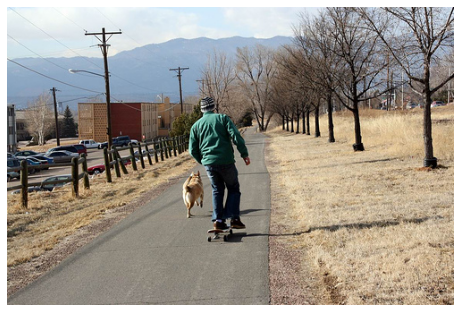

In [19]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

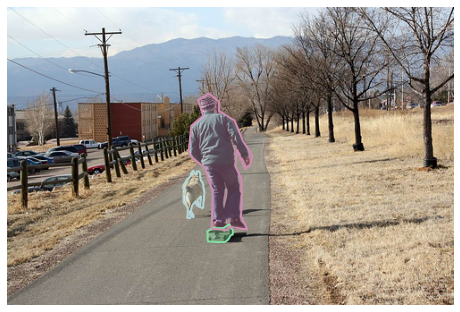

In [20]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [23]:
# initialize COCO api for person keypoints annotations
annFile='/content/val2017/coco/annotations/instances_val2017.json'
coco_kps=COCO(annFile)


loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


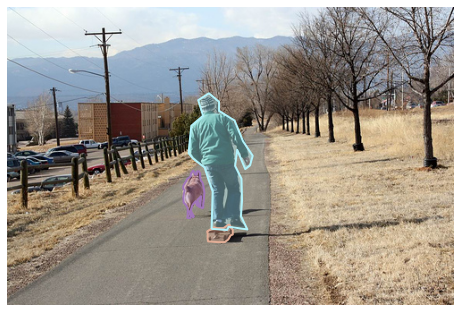

In [24]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)


In [30]:
# initialize COCO api for person keypoints annotations
annFile='/content/val2017/coco/annotations/instances_val2017.json'
coco_caps=COCO(annFile)


loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


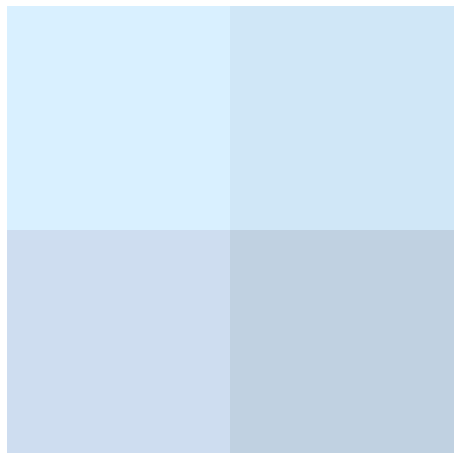

In [32]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I);
plt.axis('off');
plt.show()